In [1]:
import random

import gym
import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import profile
import subprocess

%load_ext memory_profiler

In [2]:
# Define the Q-network class
class QNetwork(tf.keras.Model):
    def __init__(self, state_size, action_size):
        super(QNetwork, self).__init__()
        self.fc1 = tf.keras.layers.Dense(32, activation='relu')
        self.fc2 = tf.keras.layers.Dense(32, activation='relu')
        self.fc3 = tf.keras.layers.Dense(action_size)

    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return self.fc3(x)

In [3]:
# Create the environment
env = gym.make('Blackjack-v1')
# env = tf_agents.environments.FlattenObservationsWrapper(env)
env.reset()
# state_size = sum([space.n for space in env.observation_space])
state_size = len(env.observation_space)
action_size = env.action_space.n
print(f"State size {state_size}")
print(f"Action size {action_size}")

State size 3
Action size 2


In [4]:
print('Observation Spec:')
# print(env.time_step_spec().observation)
print(env.observation_space)

Observation Spec:
Tuple(Discrete(32), Discrete(11), Discrete(2))


In [5]:
from DQNAgent import DQNAgent

# Create the DQN agent
agent = DQNAgent(state_size, action_size)

# Train the agent
score_history = agent.train(env, episodes=400)
# %mprun -f agent.train -T train_profile.txt agent.train(env, episodes=100)
# %mprun -f agent.train agent.train(env, episodes=100)

Episode: 0, simulating
epsilon 1.0
Basic Strategy Total Reward: 159 / 216

Score history size 1
Episode: 1, simulating
epsilon 0.95
Basic Strategy Total Reward: 161 / 216

Score history size 2
Episode: 2, simulating
epsilon 0.9025
Basic Strategy Total Reward: 150 / 216

Score history size 3
Episode: 3, simulating
epsilon 0.8573749999999999
Basic Strategy Total Reward: 150 / 216

Score history size 4
Episode: 4, simulating
epsilon 0.8145062499999999
Basic Strategy Total Reward: 150 / 216

Score history size 5
Episode: 5, simulating
epsilon 0.7737809374999999
Basic Strategy Total Reward: 150 / 216

Score history size 6
Episode: 6, simulating
epsilon 0.7350918906249998
Basic Strategy Total Reward: 150 / 216

Score history size 7
Episode: 7, simulating
epsilon 0.6983372960937497
Basic Strategy Total Reward: 150 / 216

Score history size 8
Episode: 8, simulating
epsilon 0.6634204312890623
Basic Strategy Total Reward: 124 / 216

Score history size 9
Episode: 9, simulating
epsilon 0.630249409

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


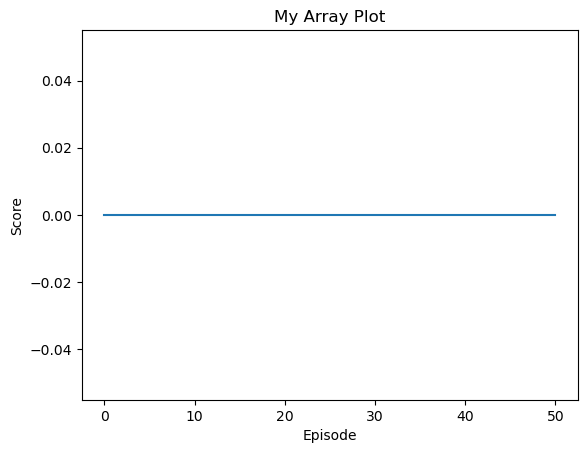

In [6]:
print(score_history)
plt.plot(score_history)
# plt.plot([1, 4, 2, 8, 5, 7, 10, 6, 9, 3])
plt.title('My Array Plot')
plt.xlabel('Episode')
plt.ylabel('Score')
# plt.grid(True)
plt.show()

In [7]:
agent.test_model_vs_basic_strategy(verbose=True)

(4, 2, False) - [[-0.205744   -0.24608238]]
0 1

(4, 3, False) - [[-0.25908044 -0.27061576]]
0 1

(5, 2, False) - [[-0.2382496  -0.26239714]]
0 1

(5, 3, False) - [[-0.2643349  -0.29217774]]
0 1

(6, 2, False) - [[-0.26111108 -0.28100067]]
0 1

(6, 3, False) - [[-0.28592363 -0.3022077 ]]
0 1

(7, 2, False) - [[-0.28647086 -0.29879498]]
0 1

(7, 3, False) - [[-0.30704775 -0.31877396]]
0 1

(8, 2, False) - [[-0.299026   -0.31215954]]
0 1

(8, 3, False) - [[-0.3290823  -0.33727142]]
0 1

(9, 2, False) - [[-0.30695075 -0.3256553 ]]
0 1

(9, 3, False) - [[-0.346993  -0.3552405]]
0 1

(10, 2, False) - [[-0.31114116 -0.33656675]]
0 1

(11, 2, False) - [[-0.3084646  -0.33832192]]
0 1

(12, 2, False) - [[-0.30568662 -0.33969682]]
0 1

(12, 4, False) - [[-0.4346747  -0.42762938]]
1 0

(12, 5, False) - [[-0.4699686 -0.4498205]]
1 0

(12, 6, False) - [[-0.52684724 -0.4781333 ]]
1 0

(13, 3, False) - [[-0.41966882 -0.40760243]]
1 0

(13, 4, False) - [[-0.46814427 -0.43648982]]
1 0

(13, 5, False) -

0

In [8]:
print(agent.model)